In [1]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Product defects ##

A manufacturing plant produces a specific product, and defects can be categorized into four types. Based on historical data, the company expects the following distribution of defect types:

50% of the products are expected to be defect-free.

20% of the products are expected to have Type A defects.

15% of the products are expected to have Type B defects.

15% of the products are expected to have Type C defects.




The company inspects 400 products, and the observed distribution of defect types is:

250 products were defect-free.

50 products had Type A defects.

40 products had Type B defects.

60 products had Type C defects.

In [3]:
#Let's create a table
defects = pd.DataFrame({'Type': ['No','A','B','C']})
defects

,Type
0,No
1,A
2,B
3,C


In [4]:
#Let's add more columns
defects['Past'] = [0.5, 0.2, 0.15, 0.15]
defects['Observed'] = [250/400, 50/400, 40/400, 60/400]


,Type,Past,Observed
0,No,0.50,0.625
1,A,0.20,0.125
2,B,0.15,0.100
3,C,0.15,0.150


In [5]:
defects

,Type,Past,Observed
0,No,0.50,0.625
1,A,0.20,0.125
2,B,0.15,0.100
3,C,0.15,0.150


[Text(0, 0, 'No'), Text(0, 1, 'A'), Text(0, 2, 'B'), Text(0, 3, 'C')]

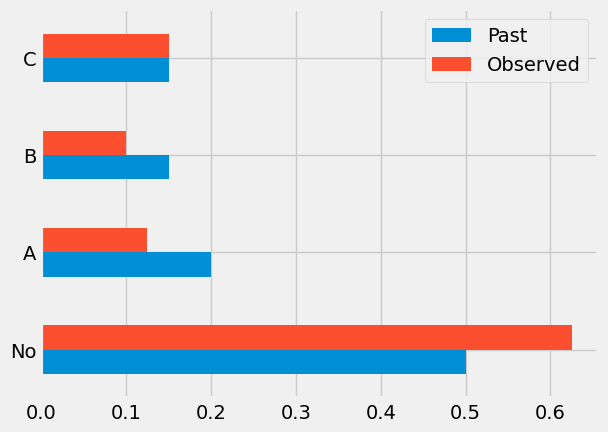

In [8]:
#plot
defects.plot(kind='barh').set_yticklabels(defects['Type'])

In [9]:
# Under the model, this is the true distribution of defects
# from which products are randomly sampled
outcomes = ['No','A','B','C']
model = [0.5, 0.2 , 0.15, 0.15]

In [15]:
#let's determine the percentage of each outome from the model distribution
simulated = np.random.choice(outcomes, p=model, size=400)
result=[]
for i in outcomes:
    result.append(sum(simulated==i)/400)

result

[0.5275, 0.195, 0.135, 0.1425]

In [16]:
# Let's simulate a random draw of 400 products from the model distribution
def sample():
  simulated = np.random.choice(outcomes, p=model, size=400)
  result=[]
  for i in outcomes:
    result.append(sum(simulated==i)/400)


  return result

In [20]:
sample()

[0.52, 0.1625, 0.1675, 0.15]

In [21]:
# Let's put this into a table
defects_with_simulated = defects.copy()
defects_with_simulated['Simulated'] = result
defects_with_simulated

,Type,Past,Observed,Simulated
0,No,0.50,0.625,0.5275
1,A,0.20,0.125,0.1950
2,B,0.15,0.100,0.1350
3,C,0.15,0.150,0.1425


[Text(0, 0, 'No'), Text(0, 1, 'A'), Text(0, 2, 'B'), Text(0, 3, 'C')]

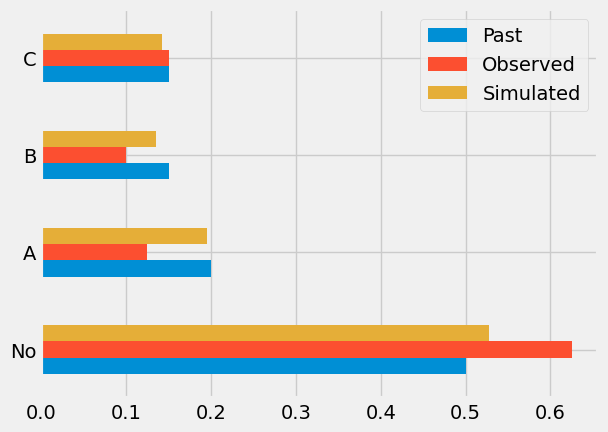

In [22]:
#Let's plot this
defects_with_simulated.plot(kind='barh').set_yticklabels(defects_with_simulated['Type'])

## Distance Between Distributions

In [23]:
# We need to understand how each of the 4 categories
# differ from their expected values according to the model.
diffs = defects['Observed'] - defects['Past']
defects_with_difference = defects.copy()
defects_with_difference['Difference'] = diffs
defects_with_difference

,Type,Past,Observed,Difference
0,No,0.50,0.625,0.125
1,A,0.20,0.125,-0.075
2,B,0.15,0.100,-0.050
3,C,0.15,0.150,0.000


## Total Variation Distance

In [25]:
#Let's define total variation distance
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [29]:
# The TVD of our observed data (observed) from their expected values
# assuming the model is true (past)
obsvd_tvd = tvd(defects['Past'],defects['Observed'])
obsvd_tvd

0.125

In [30]:
# The TVD of a model simluation from its expected values
tvd(sample(), defects['Past'])

0.007499999999999993

In [38]:
#Let's put this into a function
def simulated_tvd():
  return tvd(sample(), defects['Past'])

tvds = []

num_simulation = 10000
for i in range(num_simulation):
  new_tvd = tvds.append(simulated_tvd())
  tvds.append(new_tvd)


Observed TVD:0.125


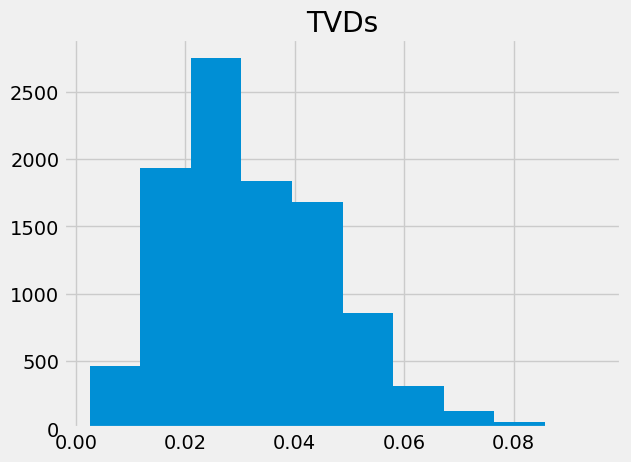

In [40]:
#Let's plot the results
df = pd.DataFrame({'TVDs': tvds}).hist()
print('Observed TVD:' + str(obsvd_tvd))

In [36]:
tvds

[<function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function __main__.simulated_tvd()>,
 None,
 <function